# GeoPandas demo

This demonstration is inspired by http://nbviewer.jupyter.org/github/jorisvandenbossche/talks/blob/master/2017_EuroScipy_geopandas/geopandas_demo.ipynb

In [1]:
%matplotlib inline

import pandas as pd

import geopandas
from shapely.geometry import Point, Polygon

pd.options.display.max_rows = 10

# Determine number of trash containers per 'wijk' in Rotterdam.

GeoPandas can read and write many different GIS file formats by relying on the fiona library (which is an interface to GDAL/OGR).

The data we're going to use today consists of two datasets:
* The 'Wijk- en buurtkaart 2017' with all regional areas in the Netherlands, available at CBS
  https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische%20data/wijk-en-buurtkaart-2017
* The locations of all trash containers in Rotterdam, available from the OpenData portal of the municipality of Rotterdam.
  http://rotterdamopendata.nl/dataset/vuilcontainers
 
De Wijk- en Buurtkaart is samengesteld uit drie bronnen. De gemeentegrenzen komen uit de Basis Registratie Kadaster (BRK); de buurtgrenzen hebben de opgave van gemeenten als basis en de grens van het land met grotere wateren gebaseerd op de meest recente kaart van het Bestand Bodemgebruik van CBS.

## Reading standard GIS formats

For the analysis, we use the 'Wijken'. This data is provided in Shape format.

In [2]:
wijken = geopandas.read_file("wijk_2017.shp")

In [3]:
wijken.head()

,WK_CODE,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,WATER,OAD,STED,AANT_INW,AANT_MAN,...,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER,geometry
0,WK000300,Wijk 00,GM0003,Appingedam,1,NEE,1045,3,11970,5800,...,6,0,1,1,2,2,2458,2378,80,"POLYGON ((249539.9504394532 593217.5787963867,..."
1,WK000500,Wijk 00,GM0005,Bedum,1,NEE,678,4,10480,5240,...,3,0,0,0,0,2,4496,4454,41,"POLYGON ((233048.8519897461 589658.1170043945,..."
2,WK000700,Wijk 00 Bellingwolde,GM0007,Bellingwedde,1,NEE,118,5,4030,2055,...,4,0,0,0,0,4,4365,4296,69,"POLYGON ((272254.4133911133 575636.0382080078,..."
3,WK000701,Wijk 01 Oost,GM0007,Bellingwedde,1,NEE,46,5,970,515,...,1,0,0,1,0,0,2450,2411,39,"POLYGON ((273917.5 567899.5, 274075.0938110353..."
4,WK000702,Wijk 02 Blijham,GM0007,Bellingwedde,1,NEE,207,5,3915,1960,...,2,0,0,0,0,2,4194,4130,64,"POLYGON ((264726.3756103516 570763.684387207, ..."


In [4]:
wijken[['WK_NAAM', 'GM_NAAM', 'AANT_INW', 'geometry']].head()

,WK_NAAM,GM_NAAM,AANT_INW,geometry
0,Wijk 00,Appingedam,11970,"POLYGON ((249539.9504394532 593217.5787963867,..."
1,Wijk 00,Bedum,10480,"POLYGON ((233048.8519897461 589658.1170043945,..."
2,Wijk 00 Bellingwolde,Bellingwedde,4030,"POLYGON ((272254.4133911133 575636.0382080078,..."
3,Wijk 01 Oost,Bellingwedde,970,"POLYGON ((273917.5 567899.5, 274075.0938110353..."
4,Wijk 02 Blijham,Bellingwedde,3915,"POLYGON ((264726.3756103516 570763.684387207, ..."


## What's a GeoDataFrame and GeoSeries?
* GeoDataFrame is a DataFrame which has a 'geometry' column. The .geometry attribute returns a GeoSeries (the column name itself is not necessarily 'geometry')
* GeoSeries is a Series that holds (shapely) geometry objects (Points, LineStrings, Polygons, ...)

In [5]:
type(wijken)

geopandas.geodataframe.GeoDataFrame

In [6]:
wijken.geometry

0       POLYGON ((249539.9504394532 593217.5787963867,...
1       POLYGON ((233048.8519897461 589658.1170043945,...
2       POLYGON ((272254.4133911133 575636.0382080078,...
3       POLYGON ((273917.5 567899.5, 274075.0938110353...
4       POLYGON ((264726.3756103516 570763.684387207, ...
                              ...                        
3154    (POLYGON ((75418.81762695314 408392.4564208984...
3155    POLYGON ((70314.23822021486 426539.9030151367,...
3156    POLYGON ((173092.1920166016 540770.2130126953,...
3157    (POLYGON ((143914.2100219727 481992.5200195312...
3158    (POLYGON ((122416.4100341797 383920.7600097656...
Name: geometry, Length: 3159, dtype: object

In [7]:
type(wijken.geometry)

geopandas.geoseries.GeoSeries

In [8]:
type(wijken.geometry[0])

shapely.geometry.polygon.Polygon

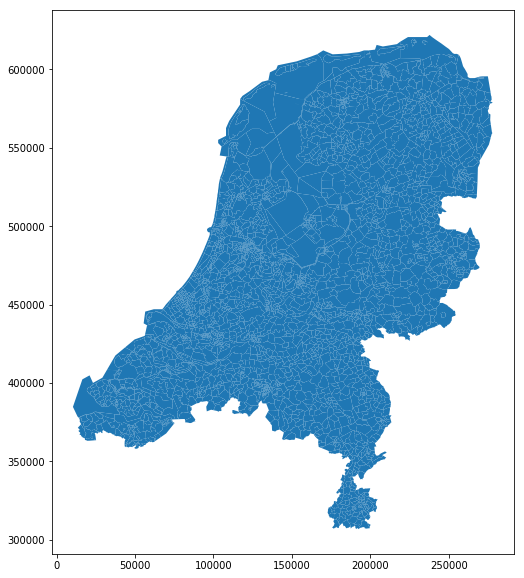

In [9]:
wijken.plot(figsize=(10,10))

# It's still a DataFrame

We still have our pandas functionality that we can use on the geospatial dataset.

A histogram showing the distribution of the population in a wijk.

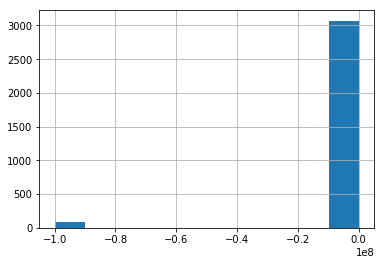

In [10]:
wijken['AANT_INW'].hist()

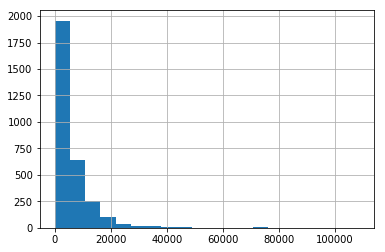

In [11]:
population = wijken[wijken['AANT_INW'] > 0].copy()
population['AANT_INW'].hist(bins=20)

In [12]:
wijken_rotterdam_rd = wijken[wijken['GM_NAAM'] == 'Rotterdam'].copy()
wijken_rotterdam_rd.drop(wijken_rotterdam_rd.index[-1], inplace=True)
len(wijken_rotterdam_rd)

22

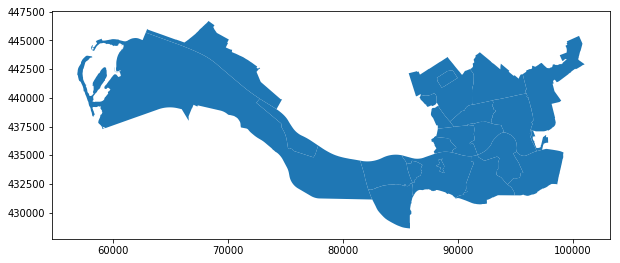

In [13]:
wijken_rotterdam_rd.plot(figsize=(10,10))

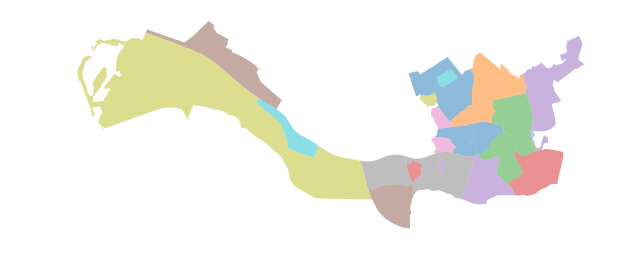

In [14]:
ax = wijken_rotterdam_rd.plot(figsize=(10, 10), cmap='tab10', alpha=0.5)
ax.set_axis_off()

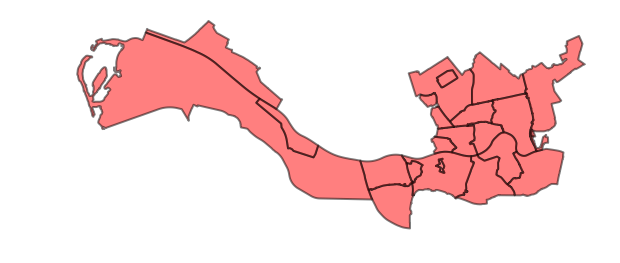

In [15]:
ax = wijken_rotterdam_rd.plot(figsize=(10, 10), edgecolor='k', facecolor='r', alpha=0.5, linewidth=2)
ax.set_axis_off()

## But we now have access to spatial predicates and operations

We can access the area of the different 'wijken'

In [16]:
wijken_rotterdam_rd.geometry.area # m2

1521    4.881826e+06
1522    5.964700e+06
1523    1.580309e+07
1524    5.352552e+06
1525    1.327772e+07
            ...     
1538    1.041733e+08
1539    1.164681e+06
1540    1.212960e+05
1541    1.518932e+06
1542    6.498654e+06
Length: 22, dtype: float64

In [17]:
wijken_rotterdam_rd.geometry.area / 1000000 # km2

1521      4.881826
1522      5.964700
1523     15.803092
1524      5.352552
1525     13.277716
           ...    
1538    104.173332
1539      1.164681
1540      0.121296
1541      1.518932
1542      6.498654
Length: 22, dtype: float64

## Get data from an Excel sheet also in a GeoDataFrame

In [18]:
xlsfile_trash = '130404-overzicht-containers.xlsx'
sheetname = 'verzamelblad gegevens'
xls_trash = pd.ExcelFile(xlsfile_trash)
trash = pd.read_excel(xls_trash, sheetname)

In [19]:
trash[['CODE', 'LOCATIE', 'rd-x', 'rd-y']].head()

,CODE,LOCATIE,rd-x,rd-y
0,41-8,2e Jerichostraat naast Jericholaan 46,94471.812301,438396.319587
1,85.A,Mijnsherenplein hoek Heenvlietstraat,93208.728776,434298.648509
2,41-161,Naaldwijkstraat hoek Brouwersstraat,94243.535474,438216.775000
3,82-63,Slaghekstraat/Pantserstraat,94339.653231,434685.825926
4,080.A,'s-Gravendijkwal naast Nieuwe Binnenweg 181.,91472.089451,436571.484790


In [20]:
trash = trash[trash['rd-x'] > 0].copy()

In [21]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(trash['rd-x'], trash['rd-y'])]
trash.drop(['rd-x', 'rd-y'], axis=1, inplace=True)
crs = {'init': 'epsg:28992'}
trash_rd = geopandas.GeoDataFrame(trash, crs=crs, geometry=geometry)

In [22]:
trash_rd[['CODE', 'LOCATIE', 'geometry']].head()

,CODE,LOCATIE,geometry
0,41-8,2e Jerichostraat naast Jericholaan 46,POINT (94471.8123008 438396.319587)
1,85.A,Mijnsherenplein hoek Heenvlietstraat,POINT (93208.72877640001 434298.648509)
2,41-161,Naaldwijkstraat hoek Brouwersstraat,POINT (94243.53547430001 438216.775)
3,82-63,Slaghekstraat/Pantserstraat,POINT (94339.6532306 434685.825926)
4,080.A,'s-Gravendijkwal naast Nieuwe Binnenweg 181.,POINT (91472.0894514 436571.48479)


## Geolocator & coordinate reference systems

Geopy is a geocoding library for Python. It uses sources like OpenStreetMap (OSM) and Google geocoding. 
Geopy can be used to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

https://github.com/geopy/geopy

In [23]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Euromast Rotterdam")
location

Location(Euromast, Maastunnel, Nieuwe Werk, Rotterdam, Zuid-Holland, Nederland, 3022, Nederland, (51.90541075, 4.46661696223998, 0.0))

In [24]:
euromast = Point(location.longitude, location.latitude)

In [25]:
import pyproj
from shapely.ops import transform

Information aboout coordinate projection can be found at http://epsg.io. Epsg stands for European Petroleum Survey Group. On this side you can fill in the location and it gives you an overview of possible.

When you have coordinates and know where it should be, projfinder might be of help: http://projfinder.com/

In [26]:
rdnap = pyproj.Proj(init='epsg:28992')
wgs84 = pyproj.Proj(init='epsg:4326')

In [27]:
rd_euromast = Point(pyproj.transform(wgs84, rdnap, euromast.x, euromast.y))
rd_euromast.x, rd_euromast.y

(91649.37257842578, 435613.07211812556)

## Geospatial analysis: distances and point in polygon

In [28]:
trash_rd['Distance_to_Euromast'] = trash_rd.geometry.distance(rd_euromast)
trash_rd['Distance_to_Euromast']

0       3963.916303
1       2039.436485
2       3675.452330
3       2845.592291
4        974.671307
           ...     
3495    3552.239395
3496    3612.310910
3497    3396.674048
3498    3186.088362
3499    3270.323317
Name: Distance_to_Euromast, Length: 3362, dtype: float64

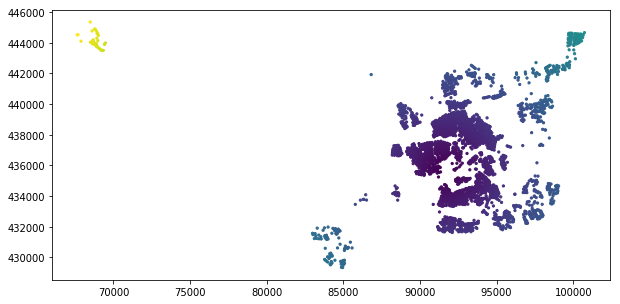

In [29]:
trash_rd.plot(markersize=5, figsize=(10, 10), column='Distance_to_Euromast')

### In which 'wijk' is the Euromast located?

In [30]:
wijken_rotterdam_rd.contains(rd_euromast)

1521     True
1522    False
1523    False
1524    False
1525    False
        ...  
1538    False
1539    False
1540    False
1541    False
1542    False
Length: 22, dtype: bool

In [31]:
wijken_rotterdam_rd[wijken_rotterdam_rd.contains(rd_euromast)]

,WK_CODE,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,WATER,OAD,STED,AANT_INW,AANT_MAN,...,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER,geometry
1521,WK059901,Rotterdam Centrum,GM0599,Rotterdam,1,NEE,6110,1,33995,17670,...,37,6,3,8,5,15,488,414,74,"POLYGON ((91412.78820800783 437507.7399902344,..."


# Points on OpenStreetMap

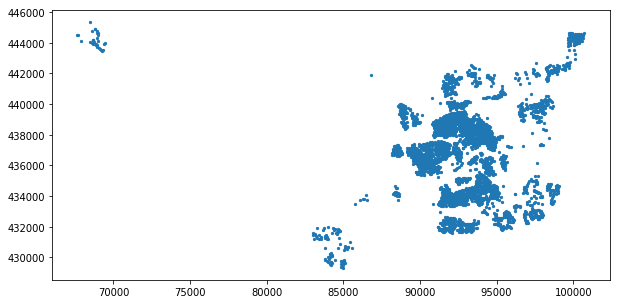

In [32]:
trash_rd.plot(markersize=5, figsize=(10, 10))

It would be nice to add the street network to the figure above. Therefore, using the osmnx package, the OpenStreetMap network of Rotterdam, and saved it as a shapefile

```
import osmnx as ox
G = ox.graph_fromplace('Rotterdam, Netherlands', network_type='drive')
ox.save_graph_shapefile(G, 'openstreetmap_rotterdam', folder='.')
```

In [33]:
streets = geopandas.read_file("openstreetmap_rotterdam/edges/")

In [34]:
streets.head()

,access,area,bridge,from,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,to,tunnel,width,geometry
0,None,None,None,44269098,residential,None,0,None,61.119,None,Frans Bekkerstraat,False,7514536,None,44269570,None,None,"LINESTRING (4.4652729 51.8918, 4.466131 51.891..."
1,None,None,None,963879003,residential,None,0,None,76.682,50,Frans Bekkerstraat,False,7515679,None,44269570,None,None,"LINESTRING (4.4652729 51.8918, 4.4647917 51.89..."
2,None,None,None,44262667,residential,None,0,None,145.552,50,Verboomstraat,False,"[7515714, 7515628]",None,44269570,None,None,"LINESTRING (4.4645496 51.8905767, 4.4648968 51..."
3,None,None,None,44425321,unclassified,None,0,None,198.646,None,François Nivardstraat,False,7312252,None,44433412,None,None,"LINESTRING (4.5624857 51.9273235, 4.5631223 51..."
4,None,None,None,44435702,unclassified,None,0,None,73.444,None,Jan van Tilburgstraat,False,7312122,None,44433412,None,None,"LINESTRING (4.5633544 51.9276693, 4.563215 51...."


In [35]:
streets = streets.to_crs(epsg=28992)

In [36]:
streets.head()

,access,area,bridge,from,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,to,tunnel,width,geometry
0,None,None,None,44269098,residential,None,0,None,61.119,None,Frans Bekkerstraat,False,7514536,None,44269570,None,None,LINESTRING (91537.67907979726 434100.050701902...
1,None,None,None,963879003,residential,None,0,None,76.682,50,Frans Bekkerstraat,False,7515679,None,44269570,None,None,LINESTRING (91537.67907979726 434100.050701902...
2,None,None,None,44262667,residential,None,0,None,145.552,50,Verboomstraat,False,"[7515714, 7515628]",None,44269570,None,None,LINESTRING (91486.16424449714 433964.590598923...
3,None,None,None,44425321,unclassified,None,0,None,198.646,None,François Nivardstraat,False,7312252,None,44433412,None,None,LINESTRING (98274.08772553888 437971.694258835...
4,None,None,None,44435702,unclassified,None,0,None,73.444,None,Jan van Tilburgstraat,False,7312122,None,44433412,None,None,LINESTRING (98334.2731986389 438009.4873831167...


In [37]:
locator_vanoord = geolocator.geocode("Van Oord,  Rotterdam")
locator_vanoord

Location(Van Oord, 211, Schaardijk, De Esch, Rotterdam, Zuid-Holland, Nederland, 3063NH, Nederland, (51.9053558, 4.5380708, 0.0))

In [38]:
loc_vanoord = Point(pyproj.transform(wgs84, rdnap, locator_vanoord.longitude, locator_vanoord.latitude))
vanoord = geopandas.GeoSeries(loc_vanoord)

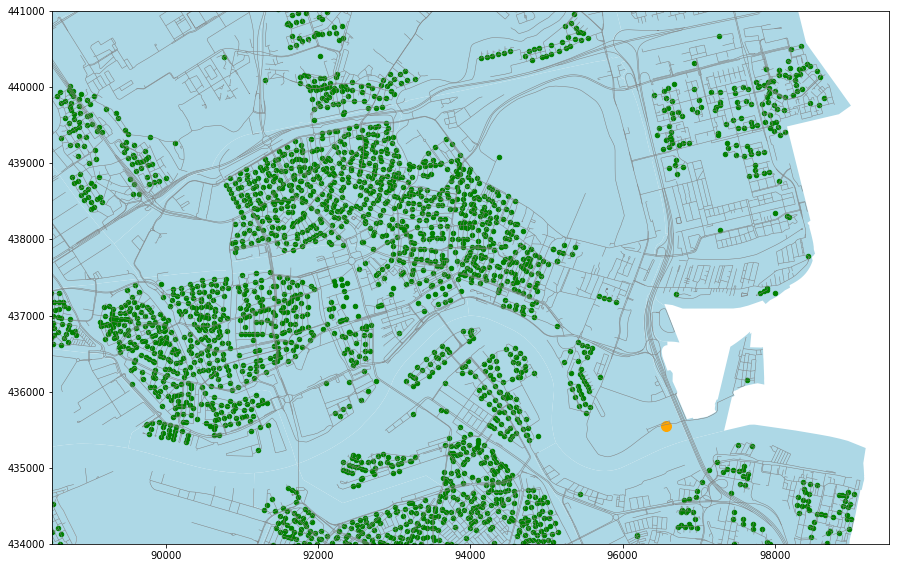

In [39]:
ax = wijken_rotterdam_rd.plot( figsize=(15, 10), color='lightblue')
streets.plot(ax=ax, linewidth=0.5, color='grey')
trash_rd.plot(ax=ax, markersize=20, color='green')
vanoord.plot(ax=ax, markersize=100, color='orange')
ax.set(xlim=(88500, 99500), ylim=(434000, 441000));

## Spatial joins

In [40]:
wijken_rotterdam_rd = wijken_rotterdam_rd.to_crs({'init': 'epsg:28992'})
trash_wijk = geopandas.sjoin(trash_rd, wijken_rotterdam_rd[['WK_NAAM', 'geometry']].copy(), op='within')

In [41]:
trash_wijk[['LOCATIE', 'geometry', 'Distance_to_Euromast', 'WK_NAAM']]

,LOCATIE,geometry,Distance_to_Euromast,WK_NAAM
0,2e Jerichostraat naast Jericholaan 46,POINT (94471.8123008 438396.319587),3963.916303,Kralingen-Crooswijk
2,Naaldwijkstraat hoek Brouwersstraat,POINT (94243.53547430001 438216.775),3675.452330,Kralingen-Crooswijk
14,1e Crooswijksedwarsstraat 68,POINT (93411.7749971 438524.429398),3403.243085,Kralingen-Crooswijk
17,1e Jerichostraat 46,POINT (94611.8839921 438203.957677),3935.627251,Kralingen-Crooswijk
18,1e Jerichostraat 68,POINT (94522.014417 438233.723072),3888.429317,Kralingen-Crooswijk
...,...,...,...,...
2914,Tasmanhof,POINT (69012.5582001 444476.174875),24310.079302,Hoek van Holland
3326,"Wierstraat, Vereniging recreatieoord Hoek van ...",POINT (68481.7074 445346.0044),25129.080378,Hoek van Holland
1190,Heijplaatstraat t.o.39,POINT (88374.7678666 434647.462188),3414.006233,Waalhaven-Eemhaven
2728,Sluisjesdijk t.o. 8b,POINT (91284.77669660001 434447.858111),1220.923355,Waalhaven-Eemhaven


In [42]:
counts = trash_wijk.groupby('WK_NAAM').size()

In [43]:
counts

WK_NAAM
Charlois                    477
Delfshaven                  487
Feijenoord                  421
Hillegersberg-Schiebroek    260
Hoek van Holland             35
                           ... 
Overschie                   102
Pernis                        6
Prins Alexander             298
Rotterdam Centrum           163
Waalhaven-Eemhaven            3
Length: 14, dtype: int64

In [44]:
wijken_rotterdam_rd = wijken_rotterdam_rd.merge(counts.reset_index(name='number_of_containers'), how='outer')

In [45]:
wijken_rotterdam_rd.fillna(0, inplace=True)

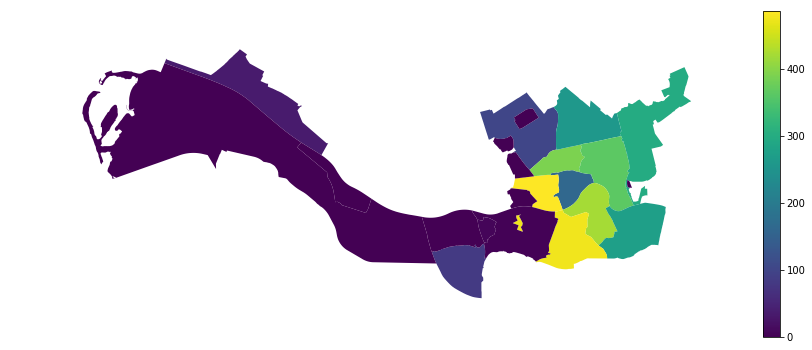

In [46]:
ax = wijken_rotterdam_rd.plot(column='number_of_containers', figsize=(15,6), legend=True)
ax.set_axis_off()

/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


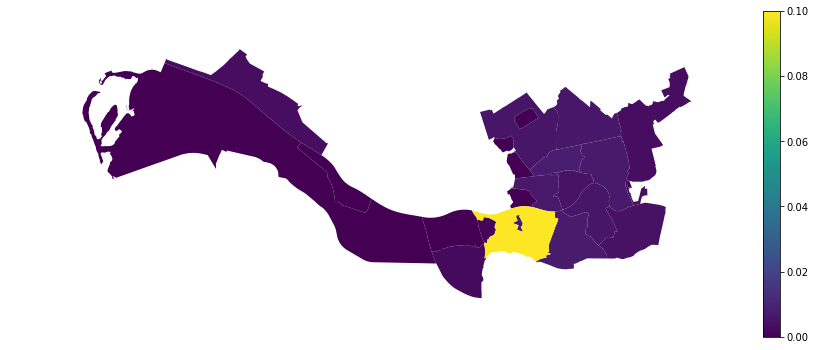

In [47]:
wijken_rotterdam_rd['relative_containers_people'] = wijken_rotterdam_rd['number_of_containers'] / wijken_rotterdam_rd['AANT_INW']
ax = wijken_rotterdam_rd.plot(column='relative_containers_people', figsize=(15,6), legend=True)
ax.set_axis_off()

In [48]:
wijken_rotterdam_rd[['WK_NAAM', 'relative_containers_people']].sort_values('relative_containers_people', ascending=False)

,WK_NAAM,relative_containers_people
15,Waalhaven-Eemhaven,0.100000
3,Noord,0.007529
10,Charlois,0.007146
5,Kralingen-Crooswijk,0.006797
1,Delfshaven,0.006422
...,...,...
21,Rozenburg,0.000000
16,Vondelingenplaat,NaN
17,Botlek-Europoort-Maasvlakte,NaN
19,Rivium,NaN


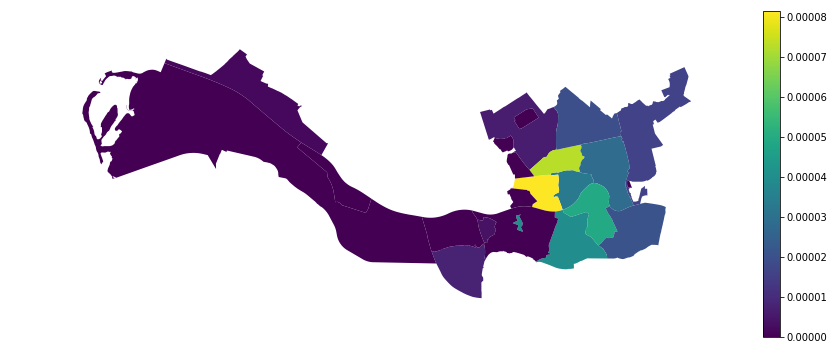

In [49]:
wijken_rotterdam_rd['relative_containers_area'] = wijken_rotterdam_rd['number_of_containers'] / wijken_rotterdam_rd.geometry.area
ax = wijken_rotterdam_rd.plot(column='relative_containers_area', figsize=(15,6), legend=True)
ax.set_axis_off()

In [50]:
wijken_rotterdam_rd[['WK_NAAM', 'relative_containers_area']].sort_values('relative_containers_area', ascending=False)

,WK_NAAM,relative_containers_area
1,Delfshaven,0.000082
3,Noord,0.000073
6,Feijenoord,0.000049
10,Charlois,0.000040
0,Rotterdam Centrum,0.000033
...,...,...
17,Botlek-Europoort-Maasvlakte,0.000000
18,Rotterdam-Noord-West,0.000000
19,Rivium,0.000000
20,Bedrijventerrein Schieveen,0.000000


## Interactive Leaflet.js maps with folium

In [51]:
import folium

In [52]:
wijken_rotterdam_wgs84 = wijken_rotterdam_rd.to_crs(epsg=4326)

In [53]:
m =folium.Map([51.905, 4.26], zoom_start=11, tiles='OpenStreetMap')
m.choropleth(geo_data=wijken_rotterdam_wgs84.to_json(), data=wijken_rotterdam_wgs84, columns=['WK_NAAM','relative_containers_area'],
             key_on = 'feature.properties.WK_NAAM', fill_color='BuGn', highlight=True)

In [54]:
m